### Visualization of novel cell type detection

In [1]:
from novel_ct_detction_fun import novel_cell_type_detection as novel_cell_type_detection

c:\Users\user\Documents\GitHub\CELLULAR_reproducibility\env\lib\site-packages\tensorflow\__init__.py:29: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
c:\Users\user\Documents\GitHub\CELLULAR_reproducibility\env\lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
c:\Users\user\Documents\GitHub\CELLULAR_reproducibility\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = novel_cell_type_detection()

In [3]:
# Set threshold for which if a sample is detected with a likelihood below this value, then we propose that a novel
# cell type is present in the data
threshold = 0.25

For each fold, dataset, and exclusion of cell type we calculate the minimum likelihood among novel cell type sample and the minimum likelihood among non-novel cell type sample. We then min-max noramlize all values, where the max is a likelihood of 1, and the min is the invers of the number of cell type labels since the lowest confidence would be when the likelihood of all possible predictions are equal. We normalize so the values become comparable between datasets and can be fused into one dataset (All Datasets)

The red line corresponds to the threshold value specified above

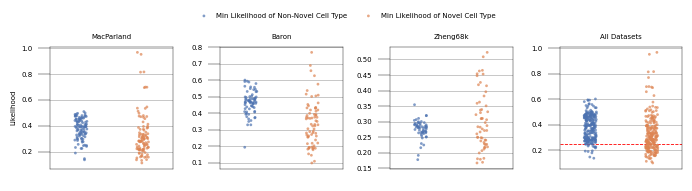

In [4]:
env.jitter_plot(image_path='figures/confidence_figure', 
                dataset_names=["MacParland", "Baron", "Zheng68k"],
                threshold=threshold)

High precision in this case means that when CELLULAR says that a novel cell type was detected, it means that it's mostly correct when saying this<br>
High coverage in this case means that CELLULAR manages to detect novel cell type in most of the cases when this is true. <br><br>
Since we priorities precision higher the coverage one typically have a fairly low coverage. This means that you can trust the model most of the cases when it says that a novel cell type is detected. But if it doesn't detect any novel cell type this doesn't mean that there isn't any novel cell type present in the data. So you can't make any conclusions if the model predict no novel cell type.

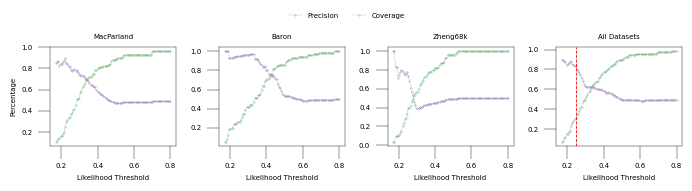

In [5]:
env.scatter_line_plot(image_path='figures/confidence_figure_line_plot',
                      threshold_=threshold) 

In [6]:
env.calc_precision_and_coverage(threshold=threshold)

Calculations are done with a confidence threshold of 0.25
If a data point exists with a confidence below this point, we assume there exists a novel cell type in the data

Dataset:  MacParland
_______________________
Precision:  0.7777777777777778
Coverage:  0.35
_______________________

Dataset:  Baron
_______________________
Precision:  0.9473684210526315
Coverage:  0.2571428571428571
_______________________

Dataset:  Zheng68k
_______________________
Precision:  0.7777777777777778
Coverage:  0.38181818181818183
_______________________

Average across datasets
_______________________
Precision:  0.8131868131868132
Coverage:  0.3288888888888889
_______________________

